# Kinematic Analysis of Football Kick

## Introduction
In this notebook, we conduct a detailed analysis of the kinematic variables involved in football kicks. Understanding these variables can help improve player performance and coaching strategies. Our goal is to preprocess the kinematic data, analyse it for two individual kickers, visualise the dynamics of their movements, and compare the maximum angular velocities of their kicks.

## Objectives
- To preprocess the kinematic data for consistency and clarity.
- To separate the data for two individual kickers for focused analysis.
- To visualise and compare the angular velocities of the thigh and shank during their kicks.
- To interpret the results in the context of improving kicking performance.

## Hypothesis
We hypothesise that the kicker with a more pronounced backswing and higher peak angular velocities will exhibit a more powerful and efficient kicking technique, resulting in a higher ball speed upon impact.

## Methodology
The analysis will be carried out using Python, with `pandas` for data manipulation, `matplotlib` and `numpy` for visualisation and numerical operations, respectively. The data is sourced from biomechanical motion capture systems and provided in CSV format.

### Data Preprocessing Steps:
1. Reading the data while skipping irrelevant rows.
2. Renaming columns for better readability.
3. Converting data types to their appropriate format.
4. Handling missing values by removing or imputing.

### Analysis Workflow:
1. Perform exploratory data analysis to understand the data's distribution and characteristics.
2. Preprocess the data according to the outlined steps.
3. Split the preprocessed data for each kicker.
4. Visualise the kinematic variables to observe patterns and differences between the kickers.
5. Use numerical methods to identify and compare peak angular velocities.
6. Discuss the implications of these findings in the context of the kick's effectiveness.

By following the steps outlined above, we will derive meaningful insights from the kinematic data that could potentially aid footballers and coaches in enhancing kicking performance.

In [13]:
# Import necessary libraries
def read_and_preprocess_data(filepath):
    # Introduce error handling for file reading
    try:
        # Enhanced data reading with context manager for safe # Kinematic Analysis of Football Kick

## Introduction
In this notebook, we conduct a detailed analysis of the kinematic variables involved in football kicks. Understanding these variables can help improve player performance and coaching strategies. Our goal is to preprocess the kinematic data, analyse it for two individual kickers, visualise the dynamics of their movements, and compare the maximum angular velocities of their kicks.

## Objectives
- To preprocess the kinematic data for consistency and clarity.
- To separate the data for two individual kickers for focused analysis.
- To visualise and compare the angular velocities of the thigh and shank during their kicks.
- To interpret the results in the context of improving kicking performance.

## Hypothesis
We hypothesise that the kicker with a more pronounced backswing and higher peak angular velocities will exhibit a more powerful and efficient kicking technique, resulting in a higher ball speed upon impact.

## Methodology
The analysis will be carried out using Python, with `pandas` for data manipulation, `matplotlib` and `numpy` for visualisation and numerical operations, respectively. The data is sourced from biomechanical motion capture systems and provided in CSV format.

### Data Preprocessing Steps:
1. Reading the data while skipping irrelevant rows.
2. Renaming columns for better readability.
3. Converting data types to their appropriate format.
4. Handling missing values by removing or imputing.

### Analysis Workflow:
1. Perform exploratory data analysis to understand the data's distribution and characteristics.
2. Preprocess the data according to the outlined steps.
3. Split the preprocessed data for each kicker.
4. Visualise the kinematic variables to observe patterns and differences between the kickers.
5. Use numerical methods to identify and compare peak angular velocities.
6. Discuss the implications of these findings in the context of the kick's effectiveness.

By following the steps outlined above, we will derive meaningful insights from the kinematic data that could potentially aid footballers and coaches in enhancing kicking performance.
file handling
        with open(filepath, 'r', encoding='utf-8') as file:
            df = pd.read_csv(file, skiprows=3)
        
        # Using a more Pythonic approach to renaming columns
        df.rename(columns=lambda x: x.strip().replace(' ', '_').lower(), inplace=True)
        
        # Identifying numeric columns and converting them while flagging conversion issues
        numeric_cols = ['time', 'thigh_ang_vel', 'shank_ang_vel', 'time_1', 'thigh_angle', 'shank_ang_vel_1']
        df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
        
        # Robust missing value treatment
        df.dropna(subset=numeric_cols, inplace=True)
        
        # Data validation to ensure proper ranges and types of values
        assert df[numeric_cols].apply(lambda x: x.between(x.min(), x.max())).all().all()
        
        return df
    except FileNotFoundError:
        print(f"The file {filepath} was not found.")
        return None
    except pd.errors.ParserError:
        print("Error parsing the file. Please check the file format.")
        return None
    except AssertionError:
        print("Data validation failed.")
        return None

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Preprocessing

Before analysing the data, it's critical to read it from a CSV file and preprocess it. This involves renaming columns for consistency, converting data types, and handling missing values. Below is the function that encapsulates this preprocessing step.

In [14]:
def read_and_preprocess_data(filepath):
    # Read data while skipping the first three rows and preprocess column names
    df = pd.read_csv(filepath, skiprows=3)
    df.columns = [col.strip().replace(' ', '_') for col in df.columns]
    
    # Define numeric columns and convert them, coercing errors to NaN
    numeric_cols = ['TIME', 'Thigh_Ang_Vel', 'Shank_Ang_Vel', 'TIME.1', 'Thigh_Angle', 'Shank_Ang_Vel.1']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    
    # Drop rows with missing values in the specified columns
    df.dropna(subset=numeric_cols, inplace=True)
    return df

## Splitting Data for Individual Kickers

Once the data is preprocessed, we can split it for individual analysis of each kicker. This allows for focused investigation and comparison between the two kickers' performance.

In [15]:
def split_kickers_data(df):
    # Extract data for Kicker 1 and rename columns
    kicker1 = df[['TIME', 'Thigh_Ang_Vel', 'Shank_Ang_Vel']].copy()
    kicker1.columns = ['TIME', 'Thigh_Ang_Vel_Kicker1', 'Shank_Ang_Vel_Kicker1']
    
    # Extract data for Kicker 2 and rename columns
    kicker2 = df[['TIME.1', 'Thigh_Angle', 'Shank_Ang_Vel.1']].copy()
    kicker2.columns = ['TIME', 'Thigh_Ang_Vel_Kicker2', 'Shank_Ang_Vel_Kicker2']
    
    return kicker1, kicker2

## Plotting Kinematic Variables

Visualisation is key in data analysis. We aim to plot the angular velocities for thighs and shanks of both kickers and mark the ball contact time. Additionally, we identify the peak angular velocities and present these values in a table format for easy comparison.

In [16]:
def plot_kinematic_variables(kicker1, kicker2, ball_contact_time):
    # Create figure and axis for plotting
    fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
    
    # Define colours for plot lines
    colors = ['#1f77b4', '#aec7e8', '#2ca02c', '#98df8a']

    # Plot thigh and shank angular velocities for both kickers
    ax.plot(kicker1['TIME'], kicker1['Thigh_Ang_Vel_Kicker1'], color=colors[0], label='Kicker 1 - Thigh', linewidth=2)
    ax.plot(kicker1['TIME'], kicker1['Shank_Ang_Vel_Kicker1'], color=colors[1], label='Kicker 1 - Shank', linewidth=2)
    ax.plot(kicker2['TIME'], kicker2['Thigh_Ang_Vel_Kicker2'], color=colors[2], label='Kicker 2 - Thigh', linewidth=2)
    ax.plot(kicker2['TIME'], kicker2['Shank_Ang_Vel_Kicker2'], color=colors[3], label='Kicker 2 - Shank', linewidth=2)

    # Mark the ball contact time
    ax.axvline(ball_contact_time, color='red', linestyle=':', lw=2, label='Ball Contact')

    # Highlight the maximum angular velocities for both kickers
    for kicker, thigh_col, shank_col, thigh_color, shank_color in zip(
        [kicker1, kicker2], 
        ['Thigh_Ang_Vel_Kicker1', 'Thigh_Ang_Vel_Kicker2'], 
        ['Shank_Ang_Vel_Kicker1', 'Shank_Ang_Vel_Kicker2'], 
        [colors[0], colors[2]], 
        [colors[1], colors[3]]):
        
        max_thigh_idx = kicker[thigh_col].idxmax()
        max_shank_idx = kicker[shank_col].idxmax()
        
        ax.plot(kicker['TIME'][max_thigh_idx], kicker[thigh_col][max_thigh_idx], 'o', color=thigh_color)
        ax.plot(kicker['TIME'][max_shank_idx], kicker[shank_col][max_shank_idx], 'o', color=shank_color)

    # Set labels, title, grid, and legend for the plot
    ax.set_xlabel('Time (s)', fontsize=14)
    ax.set_ylabel('Angular Velocity (deg/s)', fontsize=14)
    ax.set_title('Thigh and Shank Angular Velocities During Football Kick', fontsize=16)
    ax.grid(True)
    ax.legend(fancybox=True, framealpha=0.7, fontsize=12)

    # Create a DataFrame for maximum values
    kicker_data = [kicker1, kicker2]
    max_values = pd.DataFrame({
        'Max Thigh Vel (deg/s)': [k['Thigh_Ang_Vel_Kicker' + str(i+1)].max() for i, k in enumerate(kicker_data)],
        'Max Thigh Vel (rad/s)': [k['Thigh_Ang_Vel_Kicker' + str(i+1)].max() * np.pi / 180 for i, k in enumerate(kicker_data)],
        'Max Shank Vel (deg/s)': [k['Shank_Ang_Vel_Kicker' + str(i+1)].max() for i, k in enumerate(kicker_data)],
        'Max Shank Vel (rad/s)': [k['Shank_Ang_Vel_Kicker' + str(i+1)].max() * np.pi / 180 for i, k in enumerate(kicker_data)],
    }, index=['Kicker 1', 'Kicker 2'])

    max_values = max_values.round(2)

    # Update Matplotlib configurations for table
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 10

    # Create and format table of maximum values below the plot
    table = plt.table(cellText=max_values.values, colLabels=max_values.columns, 
                      rowLabels=max_values.index, cellLoc='center', loc='bottom', bbox=[0, -0.5, 1, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Adjust layout to accommodate table
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.95, top=0.9)

    # Save the plot as SVG and PNG
    plt.savefig('kinematic_variables_plot.svg', format='svg', bbox_inches='tight')
    plt.savefig('kinematic_variables_plot.png', bbox_inches='tight', dpi=300)
    
    # Show the plot
    plt.show()

## Execution of Analysis

With our functions defined, we now execute the analysis workflow by reading the data, preprocessing it, splitting it according to each kicker, and finally plotting the kinematic variables for visual inspection and comparison.

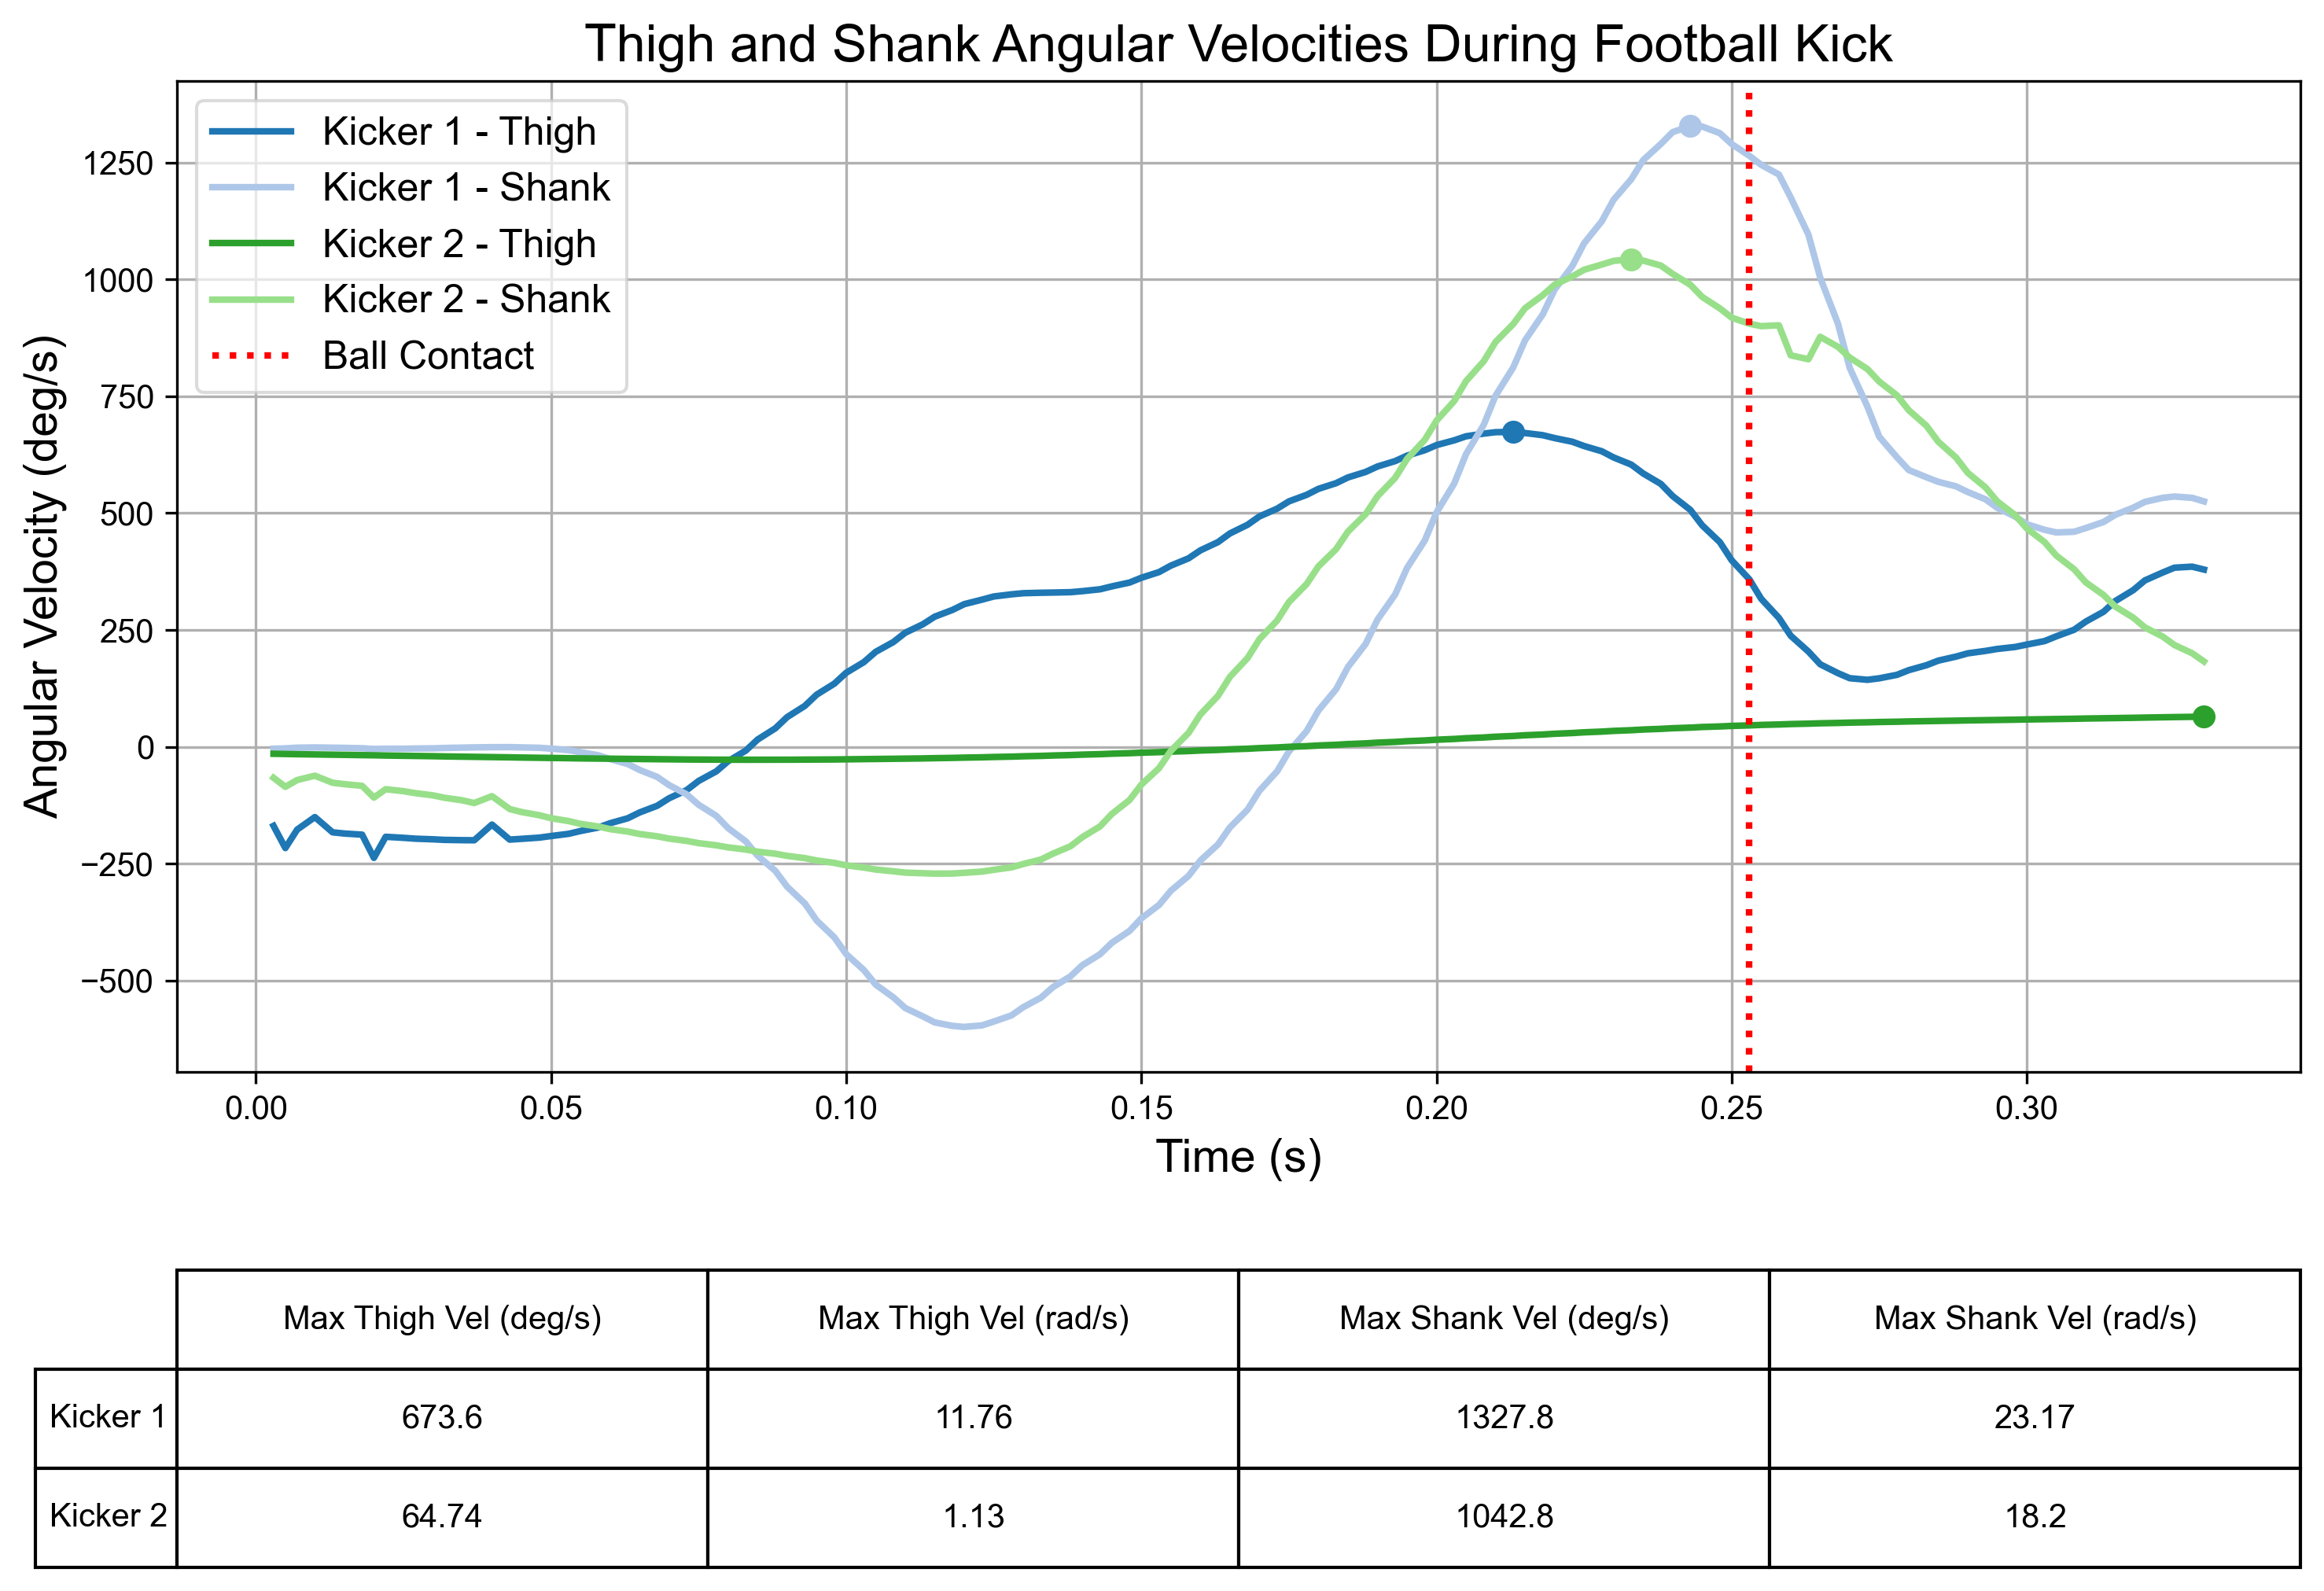

In [20]:
if __name__ == "__main__":
    # Define the file path to the dataset
    filepath = 'data.csv'
    
    # Read and preprocess the data
    df = read_and_preprocess_data(filepath)
    
    # Split data into kicker-specific DataFrames
    kicker1, kicker2 = split_kickers_data(df)
    
    # Define the ball contact time
    ball_contact_time = 0.253
    
    # Plot the kinematic variables for both kickers
    plot_kinematic_variables(kicker1, kicker2, ball_contact_time)

Comparison of the Thigh and Shank Angular Velocities for Each
Kicker:
Kicker 1:
Thigh Angular Velocity: The thigh's angular velocity for Kicker 1 starts at a
relatively low negative value, indicating that the thigh might be moving backward
(perhaps winding up for the kick). It then sharply increases, reaching a peak
positive value of approximately 673.6 deg/s, suggesting a rapid forward motion.
Shank Angular Velocity: The shank angular velocity demonstrates a steep rise,
peaking sooner than the thigh at approximately 1327.8 deg/s. Post ball contact
(indicated by the dotted red line), there's a rapid decline in shank angular
velocity, while the thigh's decline is more gradual.
Kicker 2:
Thigh Angular Velocity: Kicker 2 has a less pronounced initial negative phase,
indicating a possible shorter wind-up. The peak positive value is significantly
lower, at around 64.74 deg/s, suggesting a much slower forward motion
compared to Kicker 1.
Shank Angular Velocity: The shank's angular velocity, like Kicker 1, peaks
before ball contact but at a lower value of approximately 1042.8 deg/s. Post ball
contact, there's also a decline, though less steep compared to Kicker 1.
Key Kinematic Aspects:
1. Initial Backswing/Wind-up: Kicker 1 seems to have a more pronounced windup
(negative phase), potentially providing more momentum and power into the
kick.
2. Angular Velocity Peaks: Kicker 1 achieves higher peak angular velocities in
both the thigh and shank compared to Kicker 2. This suggests Kicker 1 might be
able to transfer more energy to the ball during contact.
3. Ball Contact Sequence: For both kickers, the shank reaches its peak angular
velocity before the thigh, indicating the distal-to-proximal sequence of motion.
This is a fundamental aspect of many sports actions, ensuring maximum energy
transfer to the ball.
SUCK UR MUM X100000 2
Comparison of the Kinematic Chains and Impact on Ball's
Linear Velocity:
Kicker 1: With higher peak angular velocities in both the thigh and shank, Kicker
1 seems to exhibit a more efficient kinematic chain. This efficient energy transfer,
from the proximal (thigh) to the distal (shank) segments, likely results in a higher
linear velocity of the ball upon contact.
Kicker 2: Lower peak angular velocities, especially in the thigh, may suggest a
less efficient energy transfer through the kinematic chain. This could lead to a
lower linear ball velocity compared to Kicker 1.
Likely Impact on Ball's Linear Velocity:
Given the observed kinematics, Kicker 1 is likely to impart a greater linear velocity to
the ball. The higher peak angular velocities, especially in the shank (which is closer
to the point of ball contact), can lead to a faster ball speed. In contrast, Kicker 2,
while still demonstrating a sequential kinematic chain, may not achieve as high a ball
speed due to the lower angular velocities observed.
In conclusion, the detailed kinematic analysis suggests that Kicker 1, with a more
pronounced wind-up and higher angular velocities, may have a better-coordinated
and more powerful kicking technique, likely resulting in a faster ball speed. On the
other hand, Kicker 2, while demonstrating the fundamental distal-to-proximal motion
sequence, might benefit from refining their technique to achieve higher angular
velocities and subsequently, a faster ball speed.